In [14]:
# imports
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
# 注意transforms是torchvision里面的工具，主要是为图像开发
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [15]:
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),  # 转变成pytorch类型的tensor，针对图像进行转变，把载入的图像转变成Pytorch格式的tensor，结果为NCHW
    transforms.Normalize((0.5,), (0.5,))]) # 标准化操作

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',# 下载“训练集”/“测试集”，并转变数据形式(对图片格式进行转变)
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',  
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)  # 这里面有一些讲究，尤其是多进程相关的，回过头来可以再看

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:         
        img = img.mean(dim=0) # 其实就是一种数据维度的压缩，可以替换为img = img.squeeze(0)
    img = img / 2 + 0.5     # unnormalize 反归一化，反向操作
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0))) # 转置回去，这是由于pytorch tensor和pil数据的内部维度排列有些差异

In [16]:
class Net(nn.Module):  # 继承nn.Module模块
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)  # 这个虽然pool只是定义了一次，但会用到多次
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss() #结合了softmax和negative log loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1') # 创建一个folder存储需要记录的数据

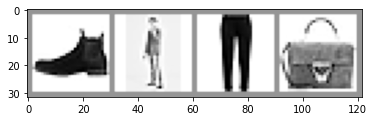

In [18]:
# get some random training images
dataiter = iter(trainloader)      # 通过使用函数iter()，将返回一个iterator迭代器（可以使用.__next__()的对象）
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images) # 定义网格图片，网格化显示a batch of images.

# show images
matplotlib_imshow(img_grid, one_channel=True) # 我们的数据是单通道图片

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [21]:
tensorboard --logdir=runs
# 在命令行运行不需要加感叹号！

SyntaxError: can't assign to operator (2441059.py, line 1)